In [4]:
import pandas as pd;
import numpy as np;
import os
import requests
import bs4 as bs
import nltk
import re
import time
import sys
import logging
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
from itertools import cycle;
import json

from gensim.models import word2vec;


from nltk.corpus import words, stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, sent_tokenize, pos_tag
#from gensim import corpora
import spacy
#spacy.load('en')
from spacy.lang.en import English

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KDTree;

import pyLDAvis.gensim
import warnings
import pickle
import gensim
from nltk.corpus import wordnet as wn
from gensim import corpora

import matplotlib.pyplot as plt

from gensim.models import Word2Vec 

warnings.filterwarnings('ignore')

In [6]:
folder_name = '/Users/michael/Downloads/cleaned_SEC/'
file_names = os.listdir(folder_name)

In [14]:
filings_for_kmeans = []
for file_name in file_names:
    file_loc = folder_name + file_name
    try:
        file = json.load(open(file_loc))
        extended_file = " "
        for word,qty in file.items():
            if len(word) < 14:
                for i in range(qty):
                    extended_file = extended_file + " " + word
        filings_for_kmeans.append(extended_file)
    except UnicodeDecodeError:
        print(file_name)

.DS_Store


In [16]:
tfidf = TfidfVectorizer()
tfidf_model = tfidf.fit_transform(filings_for_kmeans)

tfidf_model.shape

(315, 18777)

In [17]:
kmeans4 = KMeans(n_clusters=4).fit_predict(tfidf_model)
PCA4 = PCA(n_components=2).fit_transform(tfidf_model.todense())

kmeans2 = KMeans(n_clusters=2).fit_predict(tfidf_model)
PCA2 = PCA(n_components=2).fit_transform(tfidf_model.todense())

Text(0.5, 1.0, '4 Clusters')

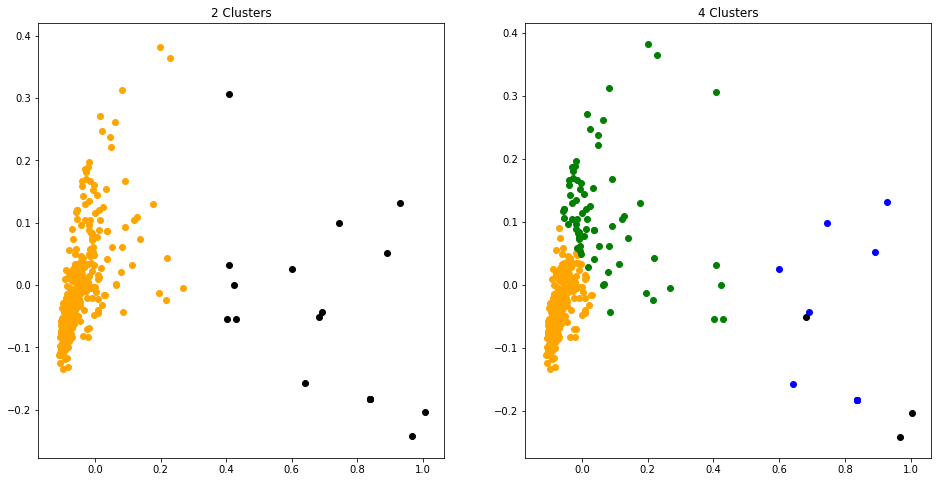

In [18]:
colors = ['orange', 'black', 'green', 'blue']

fig, ax = plt.subplots(1,2, figsize=(16,8))
for cls, col in enumerate(colors[:4]):
    cls2 = PCA2[kmeans2 == cls]
    cls4 = PCA4[kmeans4 == cls]
    ax[0].scatter(cls2[:,0], cls2[:,1], color=col)
    ax[1].scatter(cls4[:,0], cls4[:,1], color=col)
ax[0].set_title("2 Clusters")
ax[1].set_title("4 Clusters")